In [1]:
# Using tenserflow as MNIST is built in..
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


2025-08-31 10:13:24.892804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756635205.077384      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756635205.137082      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


In [4]:
# Model Building
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-31 10:13:40.608744: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# Training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8654 - loss: 0.4523 - val_accuracy: 0.9610 - val_loss: 0.1338
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9657 - loss: 0.1132 - val_accuracy: 0.9733 - val_loss: 0.0962
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0783 - val_accuracy: 0.9750 - val_loss: 0.0879
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9838 - loss: 0.0519 - val_accuracy: 0.9780 - val_loss: 0.0848
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0436 - val_accuracy: 0.9782 - val_loss: 0.0750


313/313 - 1s - 2ms/step - accuracy: 0.9755 - loss: 0.0817

Test accuracy: 97.54999876022339 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted labels: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


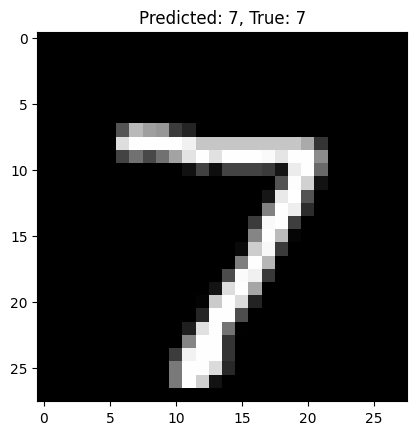

In [6]:
# Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc*100,"%")

predictions = model.predict(x_test[:10])

print("Predicted labels:", np.argmax(predictions, axis=1))
print("True labels:", y_test[:10])

plt.imshow(x_test[0].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {np.argmax(predictions[0])}, True: {y_test[0]}")
plt.show()
